In [1]:
import pandas as pd

df = pd.read_csv("data/pm_sim.csv")
df.head()


,timestamp,temperature,vibration,oil_pressure,rpm,operating_hours,ambient_temp,failure
0,2025-10-07 10:05:21.547421,82.483571,0.530780,53.314406,1277.708409,0.000000,18.285306,0
1,2025-10-07 11:05:21.547421,79.308678,0.328983,55.867369,1549.300956,0.041667,18.637900,0
2,2025-10-07 12:05:21.547421,83.238443,0.365181,50.905108,1599.644350,0.083333,23.179404,0
3,2025-10-07 13:05:21.547421,87.615149,0.574326,43.515840,1728.029808,0.125000,26.373060,0
4,2025-10-07 14:05:21.547421,78.829233,0.517087,51.998440,1816.108137,0.166667,16.757485,0


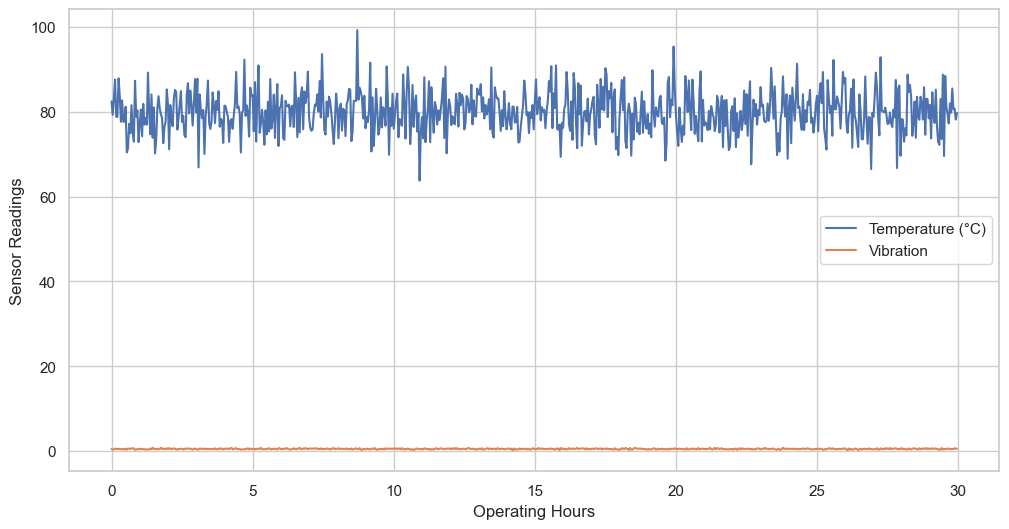

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# convert timestamp to datetime (if not already)
df['timestamp'] = pd.to_datetime(df['timestamp'])

plt.figure(figsize=(12,6))
plt.plot(df['operating_hours'], df['temperature'], label='Temperature (°C)')
plt.plot(df['operating_hours'], df['vibration'], label='Vibration')
plt.xlabel('Operating Hours')
plt.ylabel('Sensor Readings')
plt.legend()
plt.show()


In [3]:
# features and target
X = df[['temperature', 'vibration', 'oil_pressure', 'rpm', 'operating_hours', 'ambient_temp']]
y = df['failure']

# split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# create and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

# evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00        15

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

[[129   0]
 [  0  15]]


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os

# ensure models folder exists
os.makedirs("models", exist_ok=True)

# train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# save model for later use
joblib.dump(model, "models/pm_best.joblib")
print("Model saved to models/pm_best.joblib")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00        15

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

[[129   0]
 [  0  15]]
Model saved to models/pm_best.joblib


In [6]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy  # this will display the number in notebook


1.0